In [1]:
#importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [2]:
#We need a engine to read parquet
#pip install fastparque
#OR
#pip install pyarrow

In [3]:
#Reading parquet file
df = pd.read_parquet("megamarket.parquet") 

In [4]:
#Check the datatypes in dataset
#in addition to that event types are: 0 - click, 1 - add to cart, 2 - purchase
df.dtypes

user_id                 int32
datetime       datetime64[ms]
event                   int32
item_id                 int32
category_id             int32
price                 float32
dtype: object

In [5]:
#First look at the data
df.head(20)

,user_id,datetime,event,item_id,category_id,price
0,1199174,2023-02-13 03:12:19.131,2,1861088,5395,-0.042062
1,3124963,2023-02-13 09:38:55.674,2,2084441,1531,0.079817
2,2106055,2023-02-13 08:26:05.004,2,2586689,9294,-0.038990
3,4169844,2023-02-13 16:55:08.470,2,2586689,9294,-0.038990
4,7472260,2023-02-13 03:30:13.093,2,2586689,9294,-0.038990
5,7472260,2023-02-13 03:30:13.544,2,2586689,9294,-0.038990
6,2326284,2023-02-13 14:16:47.259,2,1546653,8766,-0.042370
7,7704823,2023-02-13 16:09:46.000,0,1546653,8766,-0.042370
8,7704823,2023-02-13 16:09:46.000,0,1546653,8766,-0.042370
9,7704823,2023-02-13 16:09:46.000,0,1546653,8766,-0.042370


In [6]:
#Getting summary 
#Converting scientific notation for better understanding
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,user_id,datetime,event,item_id,category_id,price
count,196644020.000,196644020,196644020.000,196644020.000,196644020.000,196644020.000
mean,5510253.830,2023-03-22 01:02:04.715000,1.535,1777238.852,5050.826,0.000
min,1000010.000,2023-01-15 00:00:00.708000,0.000,0.000,0.000,-0.043
25%,3272751.000,2023-02-23 10:30:59,0.000,893229.000,2756.000,-0.042
50%,5506623.000,2023-03-25 06:23:04.329000,2.000,1773157.000,5064.000,-0.038
75%,7767335.000,2023-04-19 08:39:31.109000,2.000,2673131.000,7386.000,-0.017
max,9999995.000,2023-05-14 20:59:58,3.000,3562320.000,10000.000,9852.566
std,2595632.001,NaN,0.995,1028102.113,2758.078,0.994


In [7]:
#Check for any missing values
df.isnull().sum()

user_id        0
datetime       0
event          0
item_id        0
category_id    0
price          0
dtype: int64

In [8]:
#Checking how many times an event occurs
#dataset is covering period of 4 months so event number might not be looking logical
#but it is
df['event'].value_counts().sort_values()

event
1      5460762
3     19879157
0     52961163
2    118342938
Name: count, dtype: int64

In [9]:
#Clearly there is a misinformation about our data. We are checking unique events
df['event'].unique()

array([2, 0, 3, 1])

In [10]:
#I did a quick research about event 3 but didn't find anything
#for the sake of time i will drop the rows within event 3
df.drop(df[df['event'] == 3].index, inplace=True)

In [11]:
#Lets check events again
df['event'].value_counts().sort_values()

event
1      5460762
0     52961163
2    118342938
Name: count, dtype: int64

In [111]:
#And im really courious about how many unique user_id's we have
len(df['user_id'].unique())

2730760

In [13]:
#Prices are really messy, %75 of the values are negative, changing negative prices to positive
df['price'] = df['price'].apply(lambda x: abs(x) if x<0 else x)

In [85]:
#We have only 4 months of transactions, so months and years could be useless
#but weekdays and hours are important, finding transaction days and numbering it 0-6, Monday to Sunday
df['day_of_week'] = df['datetime'].dt.weekday
df['hour'] = df['datetime'].dt.hour

Text(0.5, 1.0, 'Correlation Matrix')

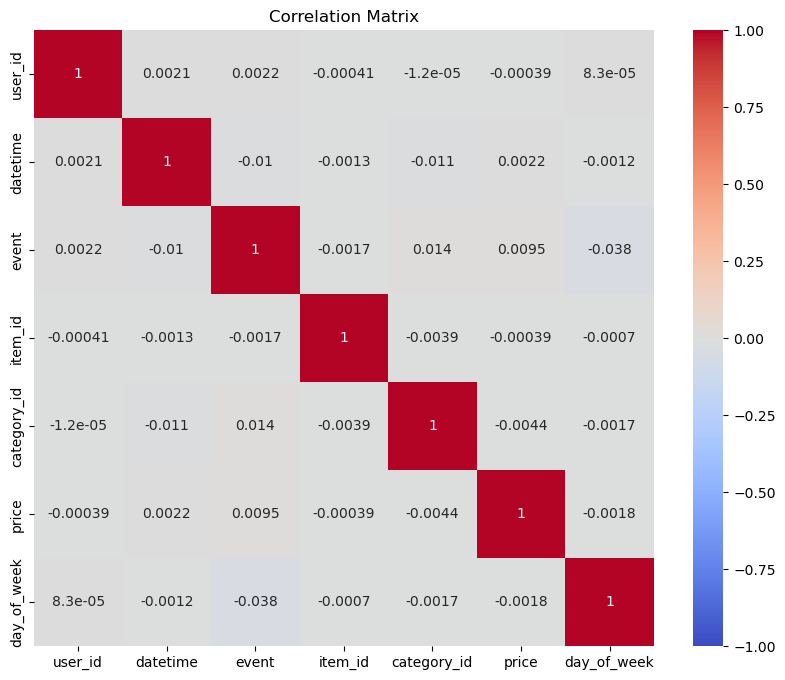

In [47]:
#I think we can check the correlation between variables right now
correlation_matrix = df.corr()
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')

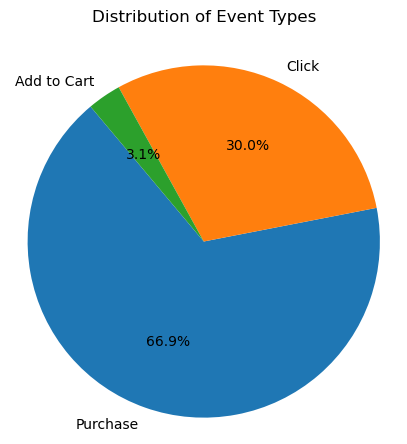

In [15]:
#Now visualize the data for better understanding
#Event Type Distrubution
event_counts = df['event'].value_counts()

plt.figure(figsize=(5, 5))
#Rotating it with startangle
plt.pie(event_counts, labels=['Purchase','Click','Add to Cart'], autopct='%1.1f%%', startangle=130)
plt.title('Distribution of Event Types', y=1.05)
plt.axis('equal')
plt.show()

In [16]:
#Total purchases by top ten customer
top_10_customers_by_total_purchases = df.groupby('user_id')['price'].sum().sort_values(ascending=False).head(10)


Text(0, 0.5, 'Total Purchases')

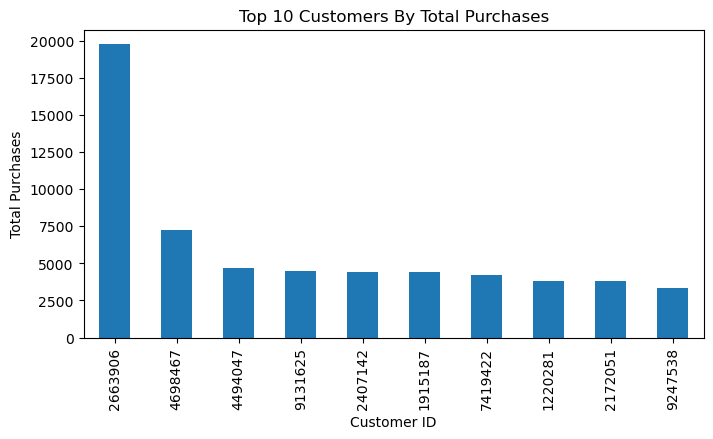

In [17]:
plt.figure(figsize=(8,4))
top_10_customers_by_total_purchases.plot(kind='bar')
plt.title('Top 10 Customers By Total Purchases')
plt.xlabel('Customer ID')
plt.ylabel('Total Purchases')

Text(0, 0.5, 'Total Earnings')

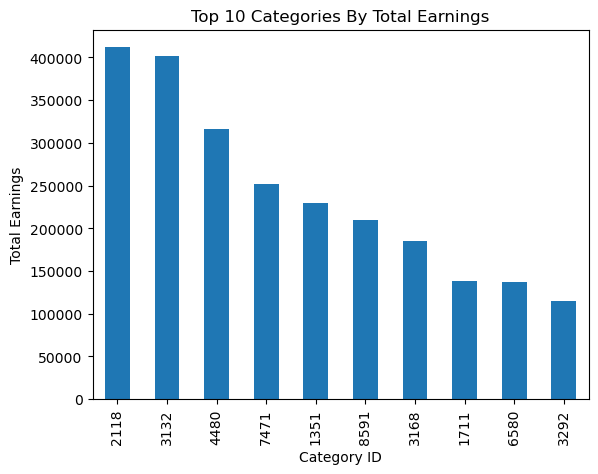

In [115]:
#Average price by product category
#We have too many categories, will be using top 10
top_10_category_by_total_earnings = df.groupby('category_id')['price'].sum().sort_values(ascending=False).head(10)
top_10_category_by_total_earnings.plot(kind='bar')
plt.title('Top 10 Categories By Total Earnings')
plt.xlabel('Category ID')
plt.ylabel('Total Earnings')


Text(0, 0.5, 'Total Earnings')

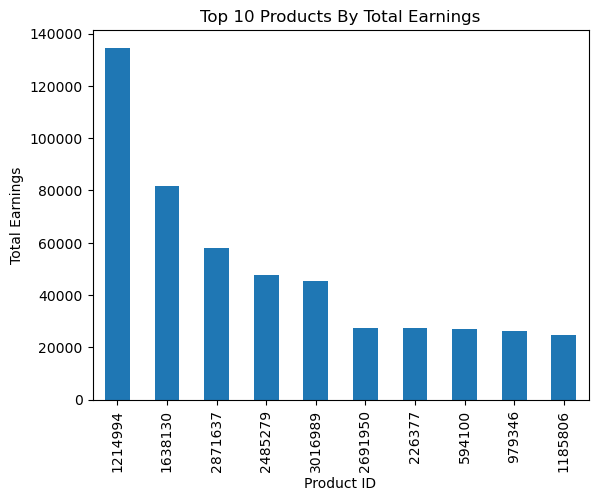

In [125]:
#Top 10 products by total earnings
top_10_products_by_total_earnings = df.groupby('item_id')['price'].sum().sort_values(ascending=False).head(10)
top_10_products_by_total_earnings.plot(kind='bar')
plt.title('Top 10 Products By Total Earnings')
plt.xlabel('Product ID')
plt.ylabel('Total Earnings')


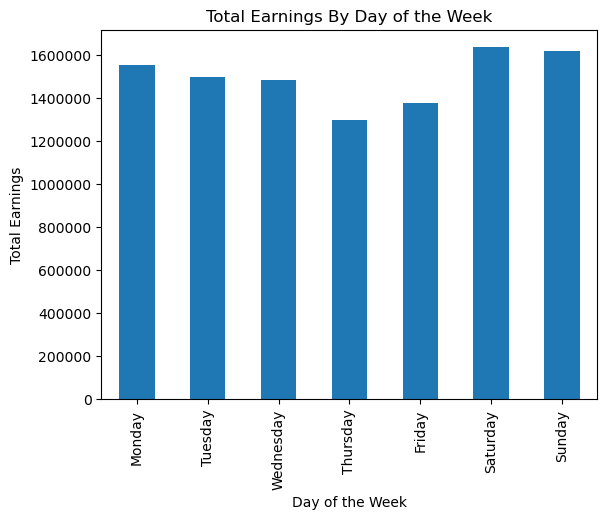

In [123]:
#Total earnings by day of the week
total_earnings_by_day_of_week=df.groupby('day_of_week')['price'].sum()
total_earnings_by_day_of_week.plot(kind='bar')
plt.title('Total Earnings By Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Earnings')
plt.xticks([0,1,2,3,4,5,6],["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
#Converting Scientific Notation
plt.ticklabel_format(style='plain', axis='y')

Text(0, 0.5, 'Total Earnings')

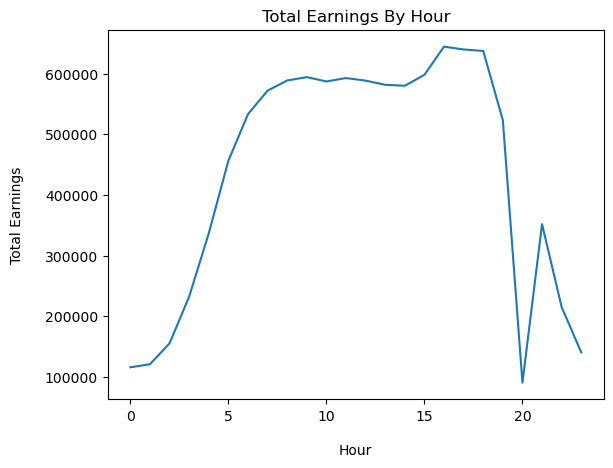

In [121]:
#Total earnings by hour
total_earnings_by_hours=df.groupby('hour')['price'].sum()
total_earnings_by_hours.plot(kind='line')
plt.title('Total Earnings By Hour')
plt.xlabel('Hour', labelpad=15)
plt.ylabel('Total Earnings', labelpad=15)

